In [5]:
# Keilands version
import sys
import os
#sys.path.append('/Users/linggeli/neuroscience/neuro_replay')
#sys.path.append('D:\Documents\Analysis\LogisticRegression\neuro_replay-master')
sys.path.append('D:\Documents\Analysis\LogisticRegression\neuro_replay-master')

In [2]:
from scipy.io import loadmat
import h5py

In [3]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use('seaborn-white')

## Data extraction
Data are extracted from Matlab files *from -2s to 2s relative to odor release* using functions in https://github.com/gaelias/statMatrixNeuralAnalysis

Call the extract Ts function to gather and create the files as you'd like

I had to use mat vesion 7.3, which broke the mat reader from scipy. I had to use an hdf5 reader to remedy this. 

Maybe some weirdness has happened, be on the lookout...

UPDATE: Ignore the HDF5 nonsense, there was too much data being pulled from the MATLAB script. Remided and fixed, but keep note that we'd need to use the newer filesystem should the data exceed 2 gigs... sigh... 

In [ ]:

# should update to:
#os.path.join(dir_name, base_filename + "." + filename_suffix)


dataPaths = {}
dataPaths['trial'] = 'D:\Documents\Data\processedHPC\{}\{}_trial_info.npy'
dataPaths['spike'] = 'D:\Documents\Data\processedHPC\{}\{}_spike_data_binned.npy'
dataPaths['lfp'] = 'D:\Documents\Data\processedHPC\{}\{}_lfp_data_sampled.npy'



In [23]:
ratsPath = os.path.join('D:',os.sep,'Documents','Data', 'extracted_CA1_trials', '')

# Build a dictionary of data paths
ratNames = ['Barat', 'Buchanan', 'Stella', 'Superchris', 'Mitt']
events = ['PokeIn', 'PokeOut']

dataPaths = {}
for rat_name in ratNames:
    dataPaths[rat_name] = {}
    for event in events:
        dataPaths[rat_name][event] = rat_name + '_extraction_odor2s_' + event + '.mat'


{'Barat': {'PokeIn': 'Barat_extraction_odor2s_PokeIn.mat',
  'PokeOut': 'Barat_extraction_odor2s_PokeOut.mat'},
 'Buchanan': {'PokeIn': 'Buchanan_extraction_odor2s_PokeIn.mat',
  'PokeOut': 'Buchanan_extraction_odor2s_PokeOut.mat'},
 'Mitt': {'PokeIn': 'Mitt_extraction_odor2s_PokeIn.mat',
  'PokeOut': 'Mitt_extraction_odor2s_PokeOut.mat'},
 'Stella': {'PokeIn': 'Stella_extraction_odor2s_PokeIn.mat',
  'PokeOut': 'Stella_extraction_odor2s_PokeOut.mat'},
 'Superchris': {'PokeIn': 'Superchris_extraction_odor2s_PokeIn.mat',
  'PokeOut': 'Superchris_extraction_odor2s_PokeOut.mat'}}

In [32]:
#rat_name, event = 'Superchris', events[0]
saveFolder = 'computedData\\'


# Run some computations, and save the output...
for rat_name in ratNames:
    print(rat_name, end="\n")
    for event in events:
        
        # Read in the mat data
        filePath = ratsPath + dataPaths[rat_name][event]
        data_odor = loadmat(filePath)

        # Save the trial info...
        saveName = saveFolder + rat_name + '_' + event + '_trial_info.npy'
        np.save(saveName, data_odor['trialInfo'])
        
        # ... and the binned spike data...
        spike_data = data_odor['unitEpoch'][:, 1:, :]  
        # remove the first time point at -2s so that the time series length becomes 4000 for convenience
        spike_data_temp = np.swapaxes(spike_data, 1, 2)
        # reduce the temporal resolution to 10ms by averaging every 10 time points
        spike_data_binned = np.mean(spike_data_temp.reshape((data_odor['unitEpoch'].shape[0], data_odor['unitEpoch'].shape[2], 400, 10)), axis=3)
        saveName = saveFolder + rat_name +  '_' + event + '_spike_data_binned.npy'
        np.save(saveName, spike_data_binned)
        
        # ... and the lfp.
        saveName = saveFolder + rat_name +  '_' + event + '_lfp_data_sampled.npy'
        np.save(saveName, data_odor['lfpEpoch'][:, 1::10, :])

        # print(data_odor.keys())

Barat
Buchanan
Stella
Superchris
Mitt


In [34]:
dataPaths = {}
dataPaths['trial'] = 'D:\Documents\Data\processedHPC\{}\{}_trial_info.npy'
dataPaths['spike'] = 'D:\Documents\Data\processedHPC\{}\{}_spike_data_binned.npy'
dataPaths['lfp'] = 'D:\Documents\Data\processedHPC\{}\{}_lfp_data_sampled.npy'

'PokeOut'

In [30]:
# Read in the data, convert to a dict from the HDF5 datastructuredataPath = 'D:\Documents\Data\superchris\superchris_drive\supercris_extraction_odor2s.mat'
#https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/
# dereference the necessary datasets as per deref

#data_odor = loadmat('/Users/linggeli/neuroscience/data/Mitt/mitt_extraction_odor2s.mat')
#data_odor = loadmat('D:\Documents\Data\processedHPC\Mitt\mitt_extraction_odor2s.mat')
#data_odor = loadmat('D:\Documents\Data\superchris\superchris_drive\supercris_extraction_odor2s.mat')
#data_odor = loadmat()
#dataPath = 'D:\\Documents\\Data\\superchris\\superchris_drive\\supercris_extraction_odor2s.mat'
#ratPath = 'D:\\Documents\\Data\\superchris\\superchris_drive\\'




#ratsPath = 'D:\\Documents\\Data\\driveCA1_wellTrained\\'
rat_name = 'Superchris'
dataPath = ratsPath + rat_name + '\\supercris_extraction_odor2s_PokeIn.mat'
data_odor = loadmat(dataPath)
print(data_odor.keys())

'''
fieldNames = ['eventTimeBins', 'lfpEpoch', 'lfpIDs', 'trialInfo', 'trialTimeBins', 'unitEpoch', 'unitIDs']
deref = [0,0,1,0,1,0,1] # 'lfpIDs', 'trialTimeBins', 'unitIDs'

data_odorD = {}
with h5py.File(dataPath, 'r') as f:
    print(data_odor.keys())
    for key, dr in zip(fieldNames, deref): #list(data_odor.keys()):
        if not dr: # Check for dereferencing
            data_odorD[key] = f[key][:]
        else:
            data_odorD[key] = [f[f[key][i,0]][:] for i in range(0,f[key].shape[0])]
'''
rat_name = 'Superchris'
#print(data_odorD.keys())

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Documents\\Data\\extracted_CA1_trials\\Superchris\\supercris_extraction_odor2s_PokeIn.mat'

In [107]:
''' IGNORE
dataPath = 'D:\\Documents\\Data\\superchris\\superchris_drive\\supercris_extraction_odor2s.mat'
# SAcrew the convoluted HDF5 format. SO TTR: https://stackoverflow.com/questions/46733052/read-hdf5-file-into-numpy-array
data_odorD = {}
with h5py.File(dataPath, 'r') as f:
    print(f['lfpIDs'].shape)
    #aa = np.array(f['lfpIDs'][...])
    #aa = #f.get('lfpIDs').value
    #nme = #h5py.h5r.get_name(f['lfpIDs'][:], f.id)
    
    ds = [f[f['lfpIDs'][i,0]][:] for i in range(0,f['lfpIDs'].shape[0])]
    # Obtain the data in ds
    aa = ds
    print(type(aa))
    print(aa)
f.close()
print(type(aa))
print(aa)
'''

" IGNORE\ndataPath = 'D:\\Documents\\Data\\superchris\\superchris_drive\\supercris_extraction_odor2s.mat'\n# SAcrew the convoluted HDF5 format. SO TTR: https://stackoverflow.com/questions/46733052/read-hdf5-file-into-numpy-array\ndata_odorD = {}\nwith h5py.File(dataPath, 'r') as f:\n    print(f['lfpIDs'].shape)\n    #aa = np.array(f['lfpIDs'][...])\n    #aa = #f.get('lfpIDs').value\n    #nme = #h5py.h5r.get_name(f['lfpIDs'][:], f.id)\n    \n    ds = [f[f['lfpIDs'][i,0]][:] for i in range(0,f['lfpIDs'].shape[0])]\n    # Obtain the data in ds\n    aa = ds\n    print(type(aa))\n    print(aa)\nf.close()\nprint(type(aa))\nprint(aa)\n"

In [109]:
# information gathering on which items need referencing
# lfpIDs trialTimeBins unitIDs
'''
for key in fieldNames: #list(data_odor.keys()):
        print()
        print('_____________________________________________________________________________')
        print()
        print(key)
        print()
        print(data_odorD[key])
'''

"\nfor key in fieldNames: #list(data_odor.keys()):\n        print()\n        print('_____________________________________________________________________________')\n        print()\n        print(key)\n        print()\n        print(data_odorD[key])\n"

In [110]:
'''
for key in ['lfpIDs', 'trialTimeBins', 'unitIDs']:
        print()
        print('_____________________________________________________________________________')
        print()
        print(key)
        print()
        print(data_odorD[key].shape)
        '''

"\nfor key in ['lfpIDs', 'trialTimeBins', 'unitIDs']:\n        print()\n        print('_____________________________________________________________________________')\n        print()\n        print(key)\n        print()\n        print(data_odorD[key].shape)\n        "

In [36]:
data_odor = data_odorD
print(data_odor.keys())  # data are stored as arrays in a dictionary with these names:
'''
dict_keys(['__header__', '__version__', '__globals__', 'eventTimeBins', 'lfpEpoch', 'lfpIDs', 'trialInfo', 'trialTimeBins', 'unitEpoch', 'unitIDs'])
'''
dataPath

dict_keys(['eventTimeBins', 'lfpEpoch', 'lfpIDs', 'trialInfo', 'trialTimeBins', 'unitEpoch', 'unitIDs'])


'D:\\Documents\\Data\\superchris\\superchris_drive\\supercris_extraction_odor2s.mat'

In [111]:
print(data_odor['trialInfo'].shape)  # there are 292 trials (292, 4)
# for each trial we know the whether it is in-sequence or correct and its odor
saveName = ratPath + rat_name +'_trial_info.npy'
np.save(saveName, data_odor['trialInfo'])

(240, 9)


In [112]:
print(data_odor['unitEpoch'].shape)  
# (292, 4001, 104) there are 104 cell/neuron units and the spike train data are recorded at 4001 time points

(240, 4001, 46)


In [113]:
# some stats for the session:
_,_,num_cells = data_odor['unitEpoch'].shape
_,_,num_channels = data_odor['lfpEpoch'].shape
print('Cell Count: %s; Channel Count: %s'%(num_cells, num_channels))

Cell Count: 46; Channel Count: 21


In [114]:
print(data_odor['lfpEpoch'].shape)  
# similarly there are 21 LFP channels/tetrodes with data recorded at 4001 time points

(240, 4001, 21)


In [115]:
print(data_odor['eventTimeBins'])  # the time points are sampled every 1ms from -2s to 2s where 0s is odor release

[[-2.   ]
 [-1.999]
 [-1.998]
 ...
 [ 1.998]
 [ 1.999]
 [ 2.   ]]


In [116]:
print(data_odor['lfpIDs'])  # tetrode ids

[[array(['T10_LFP_Raw'], dtype='<U11')
  array(['T12_LFP_Raw'], dtype='<U11')
  array(['T13_LFP_Raw'], dtype='<U11')
  array(['T14_LFP_Raw'], dtype='<U11')
  array(['T15_LFP_Raw'], dtype='<U11')
  array(['T16_LFP_Raw'], dtype='<U11')
  array(['T18_LFP_Raw'], dtype='<U11')
  array(['T19_LFP_Raw'], dtype='<U11')
  array(['T1_LFP_Raw'], dtype='<U10')
  array(['T20_LFP_Raw'], dtype='<U11')
  array(['T21_LFP_Raw'], dtype='<U11')
  array(['T22_LFP_Raw'], dtype='<U11')
  array(['T23_LFP_Raw'], dtype='<U11')
  array(['T2_LFP_Raw'], dtype='<U10') array(['T3_LFP_Raw'], dtype='<U10')
  array(['T4_LFP_Raw'], dtype='<U10') array(['T5_LFP_Raw'], dtype='<U10')
  array(['T6_LFP_Raw'], dtype='<U10') array(['T7_LFP_Raw'], dtype='<U10')
  array(['T8_LFP_Raw'], dtype='<U10') array(['T9_LFP_Raw'], dtype='<U10')]]


In [117]:
print(data_odor['unitIDs'])  # mapping between tetrodes and units
#some tetrodes have no units while others have multiple

[[array(['T12-U1'], dtype='<U6') array(['T13-U1'], dtype='<U6')
  array(['T13-U2'], dtype='<U6') array(['T13-U3'], dtype='<U6')
  array(['T13-U4'], dtype='<U6') array(['T13-U5'], dtype='<U6')
  array(['T13-U6'], dtype='<U6') array(['T13-U7'], dtype='<U6')
  array(['T13-U8'], dtype='<U6') array(['T14-U1'], dtype='<U6')
  array(['T14-U2'], dtype='<U6') array(['T14-U3'], dtype='<U6')
  array(['T14-U4'], dtype='<U6') array(['T15-U1'], dtype='<U6')
  array(['T15-U2'], dtype='<U6') array(['T15-U3'], dtype='<U6')
  array(['T15-U4'], dtype='<U6') array(['T15-U5'], dtype='<U6')
  array(['T15-U6'], dtype='<U6') array(['T16-U1'], dtype='<U6')
  array(['T19-U1'], dtype='<U6') array(['T19-U2'], dtype='<U6')
  array(['T19-U3'], dtype='<U6') array(['T19-U4'], dtype='<U6')
  array(['T1-U1'], dtype='<U5') array(['T1-U2'], dtype='<U5')
  array(['T1-U3'], dtype='<U5') array(['T21-U1'], dtype='<U6')
  array(['T22-U1'], dtype='<U6') array(['T22-U2'], dtype='<U6')
  array(['T22-U3'], dtype='<U6') array(['T2

In [27]:
spike_data = data_odor['unitEpoch'][:, 1:, :]  
# remove the first time point at -2s so that the time series length becomes 4000 for convenience
spike_data_temp = np.swapaxes(spike_data, 1, 2)
# reduce the temporal resolution to 10ms by averaging every 10 time points
spike_data_binned = np.mean(spike_data_temp.reshape((data_odor['unitEpoch'].shape[0], data_odor['unitEpoch'].shape[2], 400, 10)), axis=3)
print(spike_data_binned.shape)
#np.save('spike_data_binned.npy', spike_data_binned)

(240, 46, 400)


In [28]:
from matplotlib import rcParams
plt.style.use('seaborn-white')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Georgia'

## Spike train and LFP data 
The spike train data are sparse even after 10ms binning; many units do not have spikes and those that have spikes do so not very frequently. The LFP data on the other hand are very noisy.

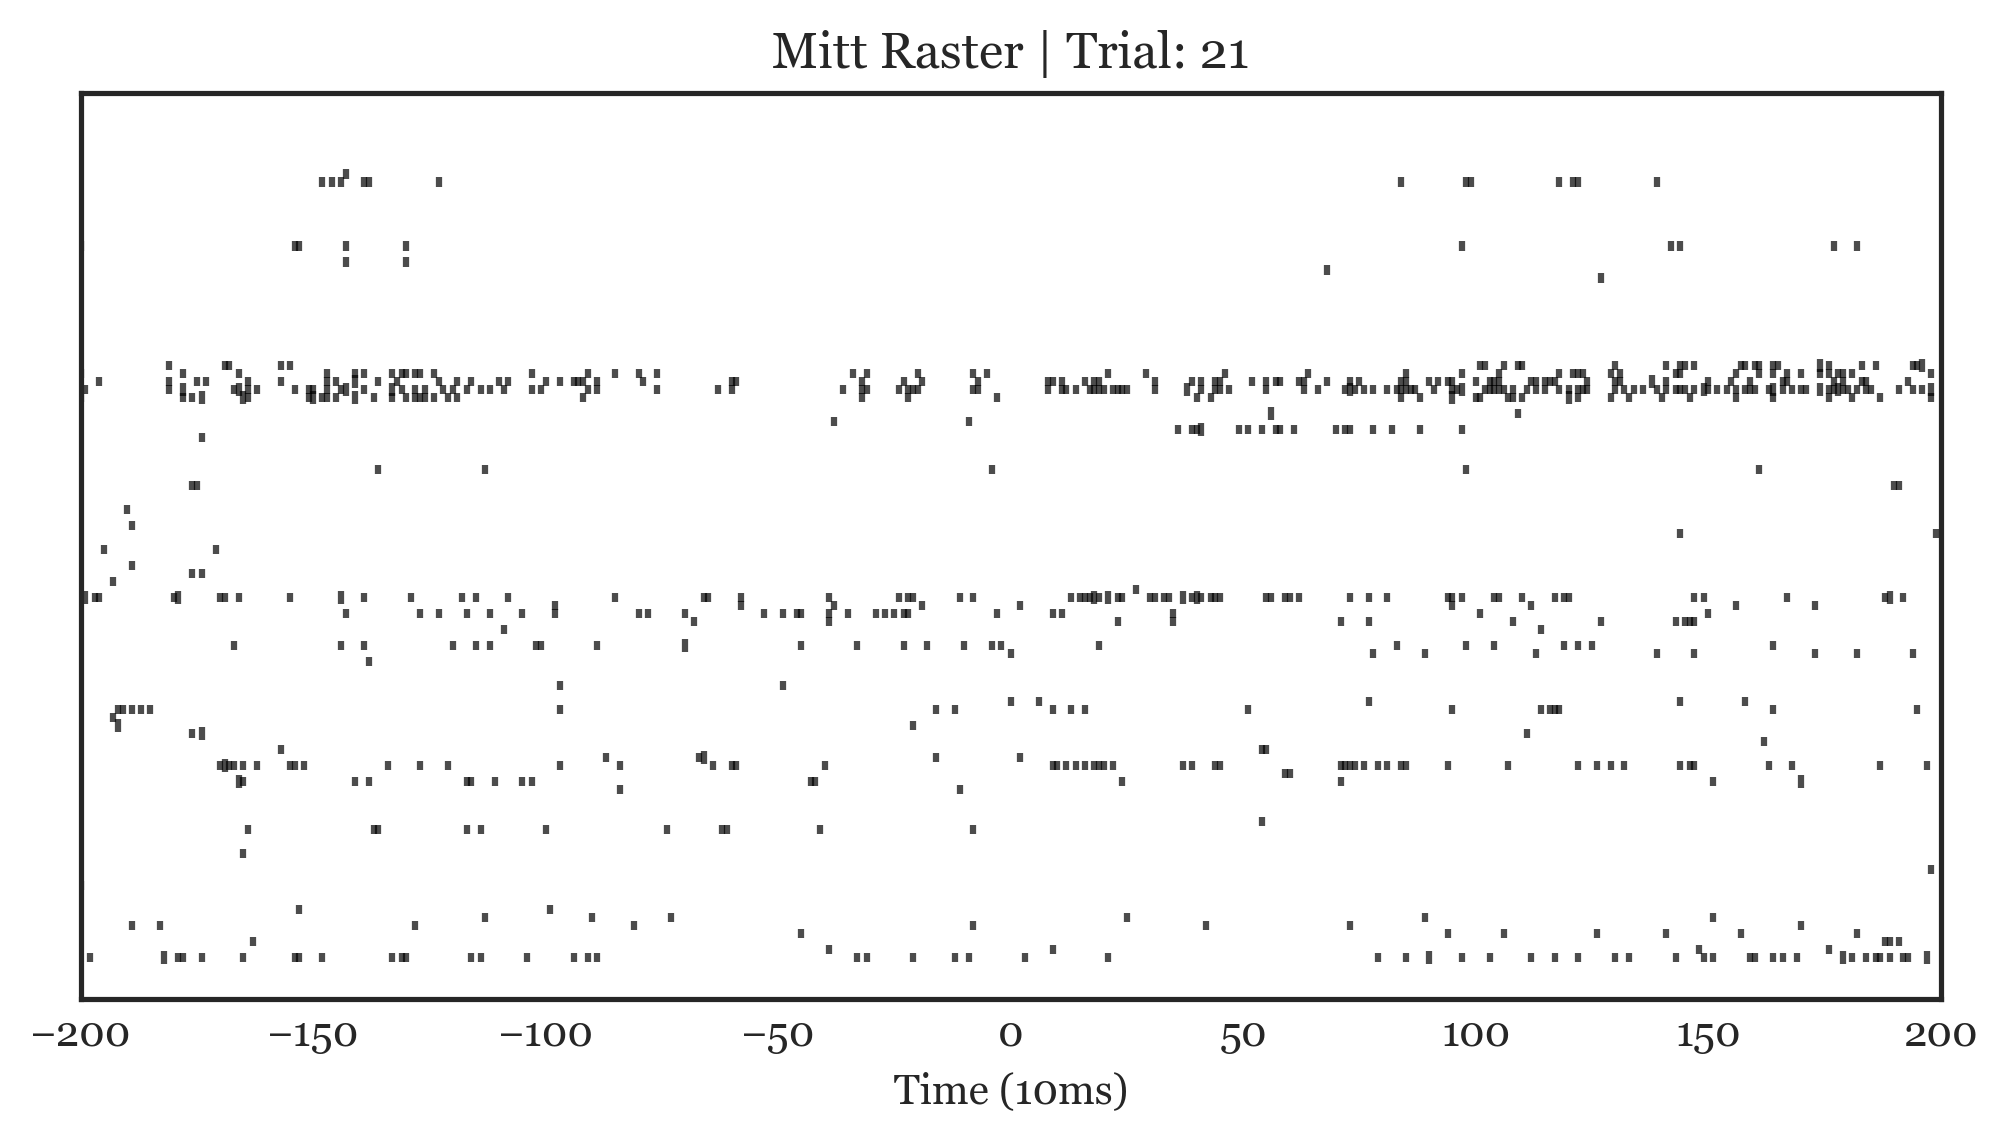

In [35]:
trial_index = 21
fig = plt.figure(figsize=(8, 4), dpi=300)
for i in range(spike_data_binned.shape[1]):
    plt.scatter(np.arange(400) - 200, np.ones(400) * i, s=spike_data_binned[trial_index, i, :] * 50, color='black', marker="|",alpha=0.7)
plt.xlim(-200, 200)
#plt.ylim(0.5, 46.5)
plt.xlabel('Time (10ms)')
plt.yticks([], [])
plt.title('%s Raster | Trial: %s'%(rat_name, trial_index))
#plt.savefig('figs\Mitt_Raster_TI-'+str(trial_index)+'.png')
plt.show()

(292, 4001, 21)


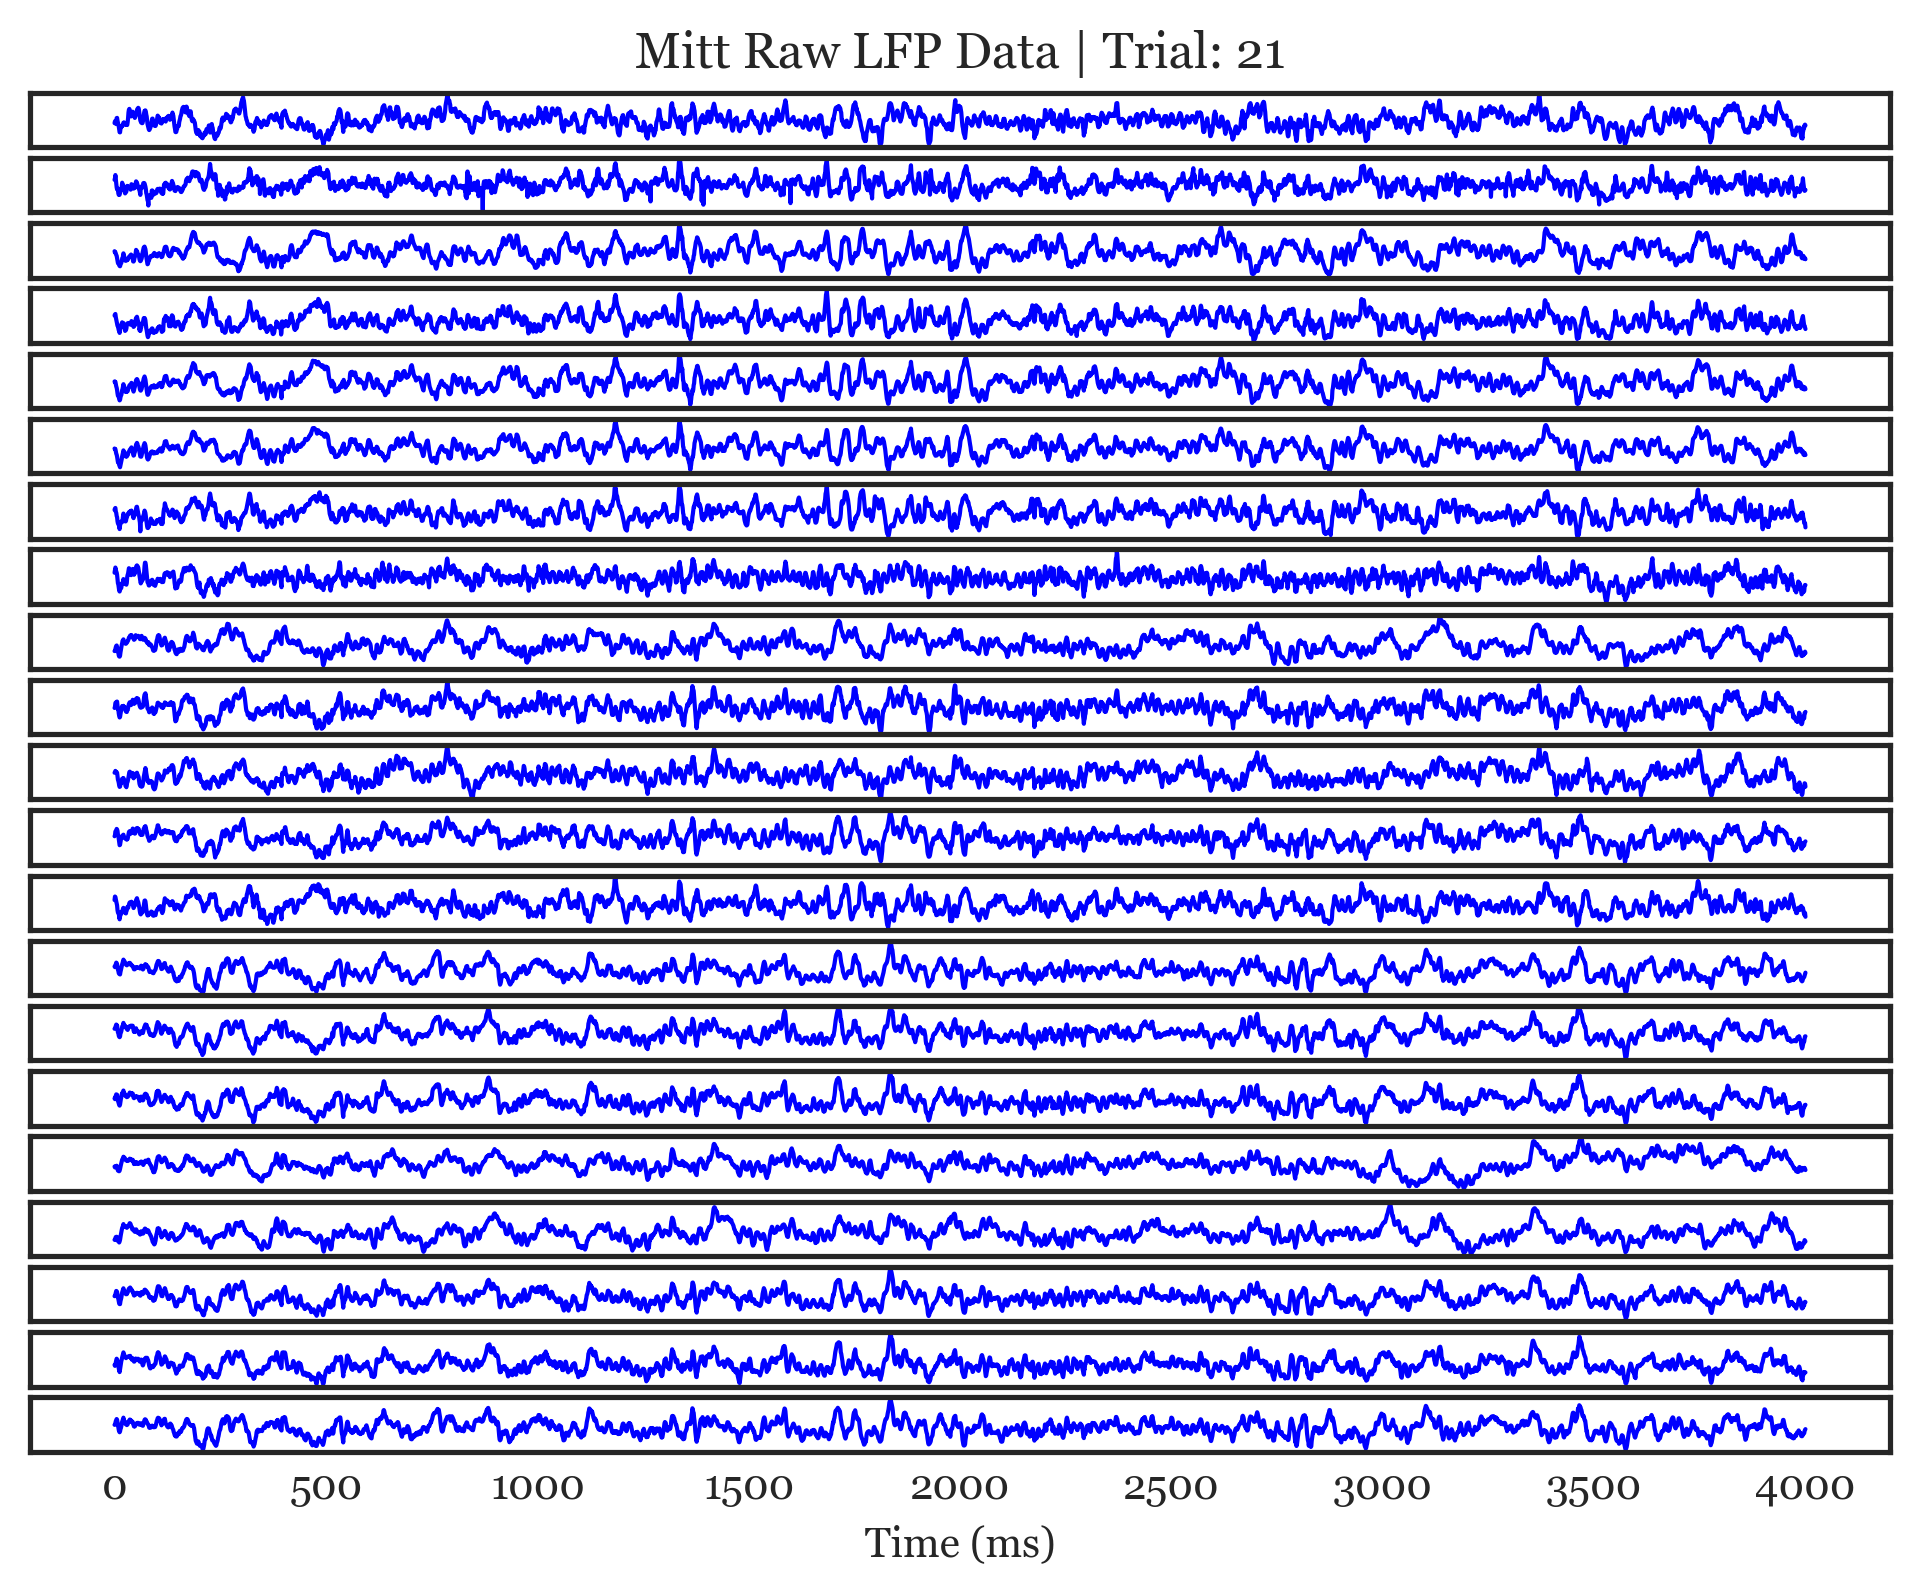

In [36]:
trial_index = 21
print(data_odor['lfpEpoch'].shape)
fig = plt.figure(figsize=(8, 6), dpi=300)
for l in range(data_odor['lfpEpoch'].shape[2]):
    plt.subplot(data_odor['lfpEpoch'].shape[2], 1, l + 1)
    plt.plot(data_odor['lfpEpoch'][trial_index][:, l], linewidth=1, c='blue')
    plt.yticks([], [])
    if l < data_odor['lfpEpoch'].shape[2] - 1:
        plt.xticks([], [])
    if l == 0:
        plt.title('%s Raw LFP Data | Trial: %s'%(rat_name, trial_index))
plt.xlabel('Time (ms)')
plt.show()

In [75]:
#np.save('lfp_data_sampled.npy', data_odor['lfpEpoch'][:, 1::10, :])

In [122]:
# get the actual clock time as opposed to time relative to odor release
n = data_odor['trialInfo'].shape[0]
actual_time = np.zeros((n, 400))
for i in range(n):
    actual_time[i, :] = data_odor['trialTimeBins'][0, :][i][1::10, 0]
#np.save('actual_time.npy', actual_time)

In [39]:
data_odor['trialInfo'].shape

(292, 9)

In [ ]:
'trialInfo' : Matrix containing information about the identity and
%           outcome of each trial. Rows represent individual trials;
%           columns are organized thusly:
%               Column 1) Trial performance. 1 = Correct, 0 = Incorrect
%               Column 2) Trial InSeq log. 1 = InSeq, 0 = OutSeq
%               Column 3) Trial Position.
%               Column 4) Trial Odor.
%               Column 5) Trial Number.
%               Column 6) Sequence Number.
%               Column 7) Poke Duration.
%               Column 8) Transposition Distance.
%               Column 9) Item Item Distance.

In [43]:
len(data_odor['trialInfo'])

292

In [44]:
rt = [data_odor['trialInfo'][i][6] for i in range(len(data_odor['trialInfo']))]

(array([  6.,   6.,  16.,  12.,  29., 204.,  15.,   2.,   1.,   1.]),
 array([0.027 , 0.2885, 0.55  , 0.8115, 1.073 , 1.3345, 1.596 , 1.8575,
        2.119 , 2.3805, 2.642 ]),
 <a list of 10 Patch objects>)

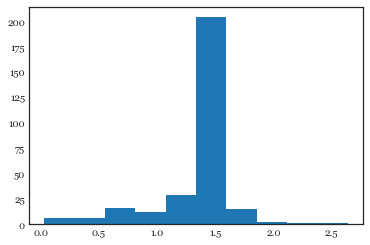

In [46]:
plt.hist(rt)

In [56]:
corTrl = data_odor['trialInfo'][:,0] == 1
data_odor['trialInfo'][corTrl, :]

array([[1.   , 1.   , 1.   , ..., 1.368, 0.   , 1.   ],
       [1.   , 1.   , 2.   , ..., 1.421, 0.   , 1.   ],
       [1.   , 1.   , 3.   , ..., 1.635, 0.   , 1.   ],
       ...,
       [1.   , 1.   , 1.   , ..., 1.355, 0.   , 1.   ],
       [1.   , 1.   , 2.   , ..., 1.402, 0.   , 1.   ],
       [1.   , 1.   , 3.   , ..., 1.365, 0.   , 1.   ]])

9
9


(array([7., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <a list of 10 Patch objects>)

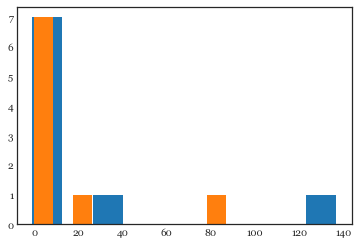

In [65]:
# correct outseq rt
co_rt = data_odor['trialInfo'][(data_odor['trialInfo'][:,0]==1) & (data_odor['trialInfo'][:,1]==0), :][6]
print(len(co_rt))

# incorrect inseq
ii_rt = data_odor['trialInfo'][(data_odor['trialInfo'][:,0]==0) & (data_odor['trialInfo'][:,1]==1), :][6]
print(len(ii_rt))

plt.hist(co_rt)
plt.hist(ii_rt)